In [1]:
import pandas as pd
from scipy.stats import linregress

In [57]:
# read in csv
df = pd.read_csv('../Resources/combined_stats.csv')
df.head()

,Team,GP,PTS,PPG,AST,TO,AST/TO,APG,Bench,Bench_PPG,...,OPP_3FG%,3PG,TO_RATIO,OPP TO,AVG_FCD_TO,TO.1,TOPG,W,L,Pct
0,Gonzaga,37,3187,86.1,602,397,1.52,16.3,769,20.78,...,34.9,7.5,2.5,489,13.22,397,10.7,31,6,83.8
1,Toledo,35,2989,85.4,521,336,1.55,14.9,534,15.26,...,36.6,8.6,3.3,452,12.91,336,9.6,27,8,77.1
2,Oral Roberts,35,2915,83.3,514,329,1.56,14.7,693,19.80,...,34.7,10.7,3.3,445,12.71,329,9.4,30,5,85.7
3,Southern Utah,37,3064,82.8,485,492,0.99,13.1,783,21.16,...,34.7,8.5,0.9,527,14.24,492,13.3,24,13,64.9
4,Youngstown St.,34,2785,81.9,521,376,1.39,15.3,639,18.79,...,34.1,8.0,1.8,438,12.88,376,11.1,24,10,70.6


In [6]:
df.describe()

,GP,PTS,PPG,AST,TO,AST/TO,APG,Bench,Bench_PPG,BLKS,...,OPP_3FG%,3PG,TO_RATIO,OPP TO,AVG_FCD_TO,TO.1,TOPG,W,L,Pct
count,352.000000,352.00000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,...,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,32.892045,2360.18750,71.640909,434.440341,409.565341,1.071761,13.169602,624.278409,18.983665,106.659091,...,33.715057,7.365057,0.221307,417.931818,12.702642,409.565341,12.479261,17.184659,15.707386,51.600284
std,2.056120,260.93211,5.009186,71.712801,46.202900,0.201620,1.722455,154.895339,4.534521,32.380884,...,2.209234,1.241220,1.882011,65.067100,1.784616,46.202900,1.445495,6.314411,5.022134,16.790481
min,24.000000,1700.00000,58.300000,280.000000,281.000000,0.600000,9.300000,313.000000,9.480000,37.000000,...,26.500000,4.100000,-4.800000,277.000000,8.310000,281.000000,8.500000,3.000000,4.000000,9.400000
25%,32.000000,2178.75000,68.150000,382.000000,379.000000,0.930000,12.000000,506.750000,15.597500,84.000000,...,32.275000,6.575000,-1.100000,371.750000,11.520000,379.000000,11.600000,13.000000,12.000000,39.400000
50%,33.000000,2339.50000,71.450000,428.000000,405.000000,1.050000,13.050000,613.500000,18.770000,102.000000,...,33.700000,7.400000,0.200000,409.000000,12.465000,405.000000,12.300000,17.000000,16.000000,52.350000
75%,34.000000,2518.25000,75.300000,474.500000,437.000000,1.180000,14.300000,723.000000,22.007500,125.250000,...,35.100000,8.100000,1.400000,460.000000,13.755000,437.000000,13.400000,22.000000,19.000000,63.675000
max,39.000000,3187.00000,86.100000,705.000000,573.000000,1.840000,19.100000,1275.000000,34.740000,242.000000,...,40.800000,11.400000,5.800000,595.000000,19.000000,573.000000,17.100000,35.000000,29.000000,89.700000


In [58]:
def linreg(x,y,xlabel):
    from scipy.stats import linregress
    import numpy as np
    import matplotlib.pyplot as plt

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    
    regress_values = x*slope + intercept
    lin_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x,y)
    plt.plot(x,regress_values,"red")
    
    plt.xlabel(xlabel)
    plt.ylabel('Typical Home Price (Single Family)')
    
    print(f"The r-value is: {rvalue}")
    print(f"{lin_eq}")

In [60]:

list = df.columns
list = list.drop("Team")
list = list.drop('Pct')

rval_df = pd.DataFrame(list)
rval_df['r-value'] = " "
rval_df = rval_df.rename(columns = {0:'Category'})


In [61]:
for index, row in rval_df.iterrows():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[f"{list[index]}"],
                                                            df['Pct'])
    
    rval_df.loc[index,'r-value'] = rvalue
rval_df.head()

,Category,r-value
0,GP,0.617447
1,PTS,0.737295
2,PPG,0.608366
3,AST,0.644959
4,TO,-0.064423


In [62]:
top_positive = rval_df.sort_values('r-value', ascending = False)
top_positive.head()

,Category,r-value
53,W,0.987294
38,SCR MAR,0.924458
1,PTS,0.737295
14,FGM,0.709852
32,DRebs,0.671447


The r-value is: 0.671446922966825
y = 0.13x + -56.43


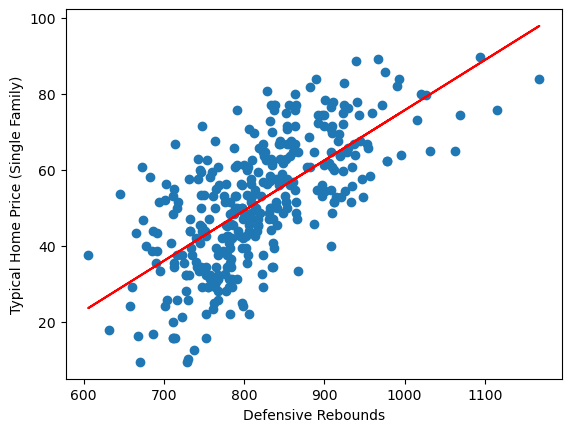

In [63]:
x = df[f"{list[32]}"]
y = df['Pct']
linreg(x,y,'Defensive Rebounds')

In [64]:
top_negative = rval_df.sort_values('r-value', ascending = True)
top_negative.head()

,Category,r-value
54,L,-0.988551
19,OPP FG%,-0.622504
37,OPP PPG,-0.514071
46,OPP_3FG%,-0.47453
52,TOPG,-0.395371


The r-value is: -0.47452985398141356
y = -3.61x + 173.19


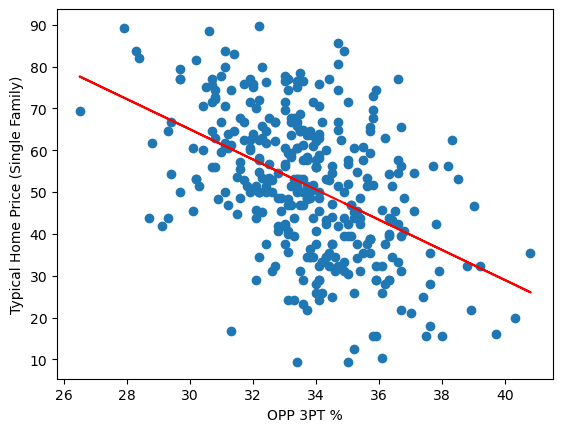

In [65]:
x = df[f"{list[46]}"]
y = df['Pct']
linreg(x,y,'OPP 3PT %')